### 1. Generate Dataset

In [85]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import numpy as np

In [86]:
X,Y = make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_informative=2,n_redundant=0)

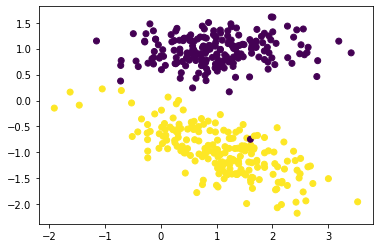

In [87]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [88]:
# Convert ou,r Y-Labels into {-1,+1}
Y[Y==0] = -1
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

### 2. Buliding SVM Model

In [89]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss = 0.0
        
        loss += 0.5 * np.dot(W,W.T)
        
        m = X.shape[0]
        for i in range(m):
            ti = Y[i] * (np.dot(W,X[i].T)+b) # ti is sacalar
            loss += self.C * max(0,(1-ti))
        
        return loss[0][0] # loss is a 2-d matrix of form- [[400.0]] --> 400.0
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1] # 2
        no_of_samples = X.shape[0] # 400
        
        n = learning_rate
        c = self.C
        
        # Init the model parameters
        W = np.zeros((1,no_of_features)) # [w1,w2] - [0,0]
        bias = 0
        
        # Training from here...
        # Weight and bias update rule
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples) # np arr from [0,1,2..,399]
            np.random.shuffle(ids) # randomly shuffled above ids arr. For batch grad desc with random shuffling
            
            # Batch Gradient Descent(in Paper) with Random Shuffling
            for batch_start in range(0,no_of_samples,batch_size):  # take jump of batch_size every time
                # Assume 0 gradient for batch - (for every batch, grad will be 0)
                gradw = 0
                gradb = 0
                
                # Iterate over all examples in the mini-batch
                for j in range(batch_start,batch_start+batch_size): # if batch size = 10,
                                                # then j - 1st itr-[0-9], 2nd itr - [10-19], and so on. 
                    if j < no_of_samples: # prevent arr out of bound
                        
                        i = ids[j] # j is just indx, i is example no from random shuffled ids
                        ti = Y[i] * (np.dot(W,X[i].T)+bias)
                        
                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                # Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
                
        self.W = W
        self.b = bias
        return W,bias,losses
    
    
    def plotHyperplane(self,X,Y,w1,w2,b):
        
        plt.figure(figsize=(12,12))
        
        x_1 = np.linspace(-2,4,10)
        x_2 = -(w1*x_1+b)/w2 # WT + B = 0
        
        x_p = -(w1*x_1+b+1)/w2 # WT + B = -1
        x_n = -(w1*x_1+b-1)/w2 # WT + B = +1
        
        plt.plot(x_1,x_2,label = "Hyperplane WX + B = 0")
        plt.plot(x_1,x_p,label = "+ve Hyperplane WX + B = -1")
        plt.plot(x_1,x_n,label = "-ve Hyperplane WX + B = +1")
        
        plt.scatter(X[:,0],X[:,1],c=Y)
        plt.show()
        
                            
                        
                
            
            

### 3. Training

In [90]:
mySVM = SVM()

In [92]:
W,bias,losses = mySVM.fit(X,Y,maxItr=100)

### 4. Visualization

400.0 14.943548418933252


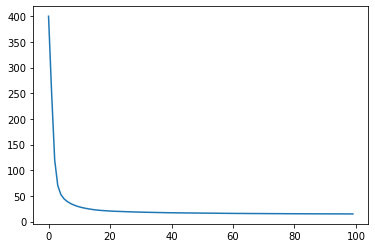

In [93]:
print(losses[0],losses[-1])
plt.plot(losses)
plt.show()

[[-0.32347323 -2.03706525]]


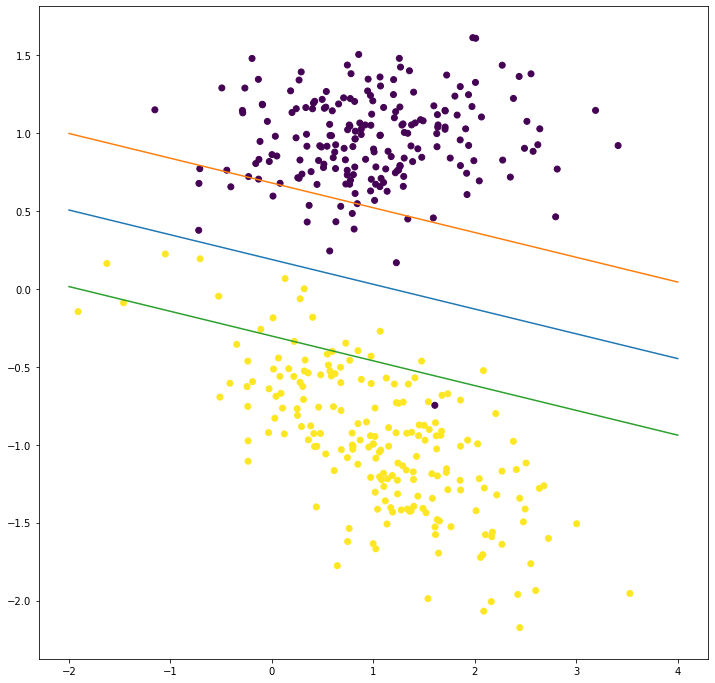

In [94]:
print(W)
w1, w2 = W[0]
mySVM.plotHyperplane(X,Y,w1,w2,bias)

### 5. Visualize Support Vectors, Positive and Negative Hyperplane

In [95]:
# Effect of changing C-(Penalty constant)
mySVM2 = SVM(C=1000)

In [96]:
W2,bias2,losses2 = mySVM2.fit(X,Y,maxItr=100)

400000.0 17031.705153238043


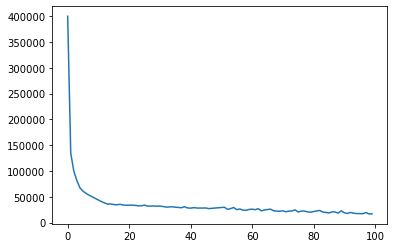

In [97]:
print(losses2[0],losses2[-1])
plt.plot(losses2)
plt.show()

[[ -9.46626912 -34.98270793]]


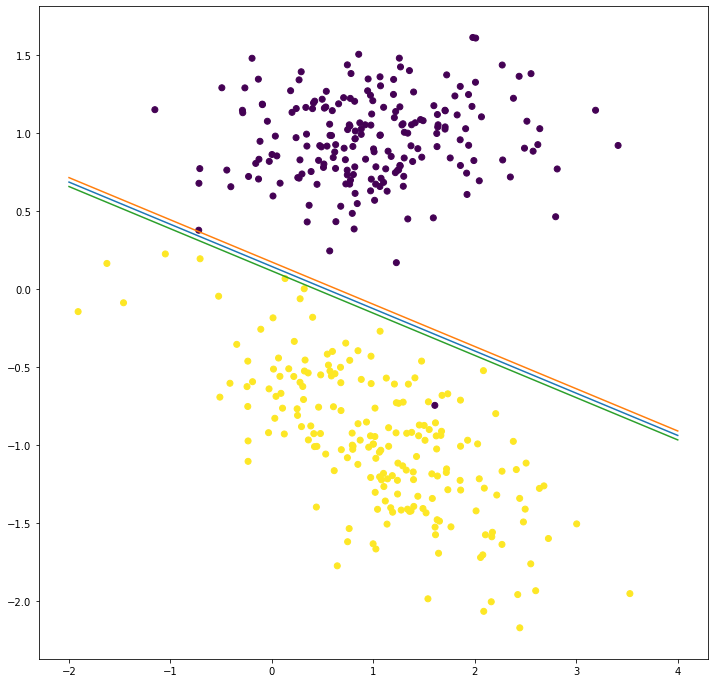

In [98]:
print(W2)
w_1, w_2 = W2[0]
mySVM2.plotHyperplane(X,Y,w_1,w_2,bias2)